# Parcial 2 Aprendizaje Automático y Análisis de Datos
- Autor: Josue Peña Atencio - 8935601
- Fecha: Abril 18 2020

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

tr = pd.read_csv('avila-tr.txt', header=None, na_values="?")
ts = pd.read_csv('avila-ts.txt', header=None, na_values="?")
tr.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'C']
ts.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'C']

data = pd.concat([tr, ts], ignore_index=True)

# Iteración 1

In [2]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,C
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
20862,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
20863,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
20864,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
20865,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [3]:
data.dtypes

F1     float64
F2     float64
F3     float64
F4     float64
F5     float64
F6     float64
F7     float64
F8     float64
F9     float64
F10    float64
C       object
dtype: object

In [4]:
data['C'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: C, dtype: int64

In [5]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


In [6]:
data.mode()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,C
0,-3.498799,-0.189174,-3.210528,-5.440122,0.261718,0.107265,0.295677,-0.24778,0.001721,-0.691759,A


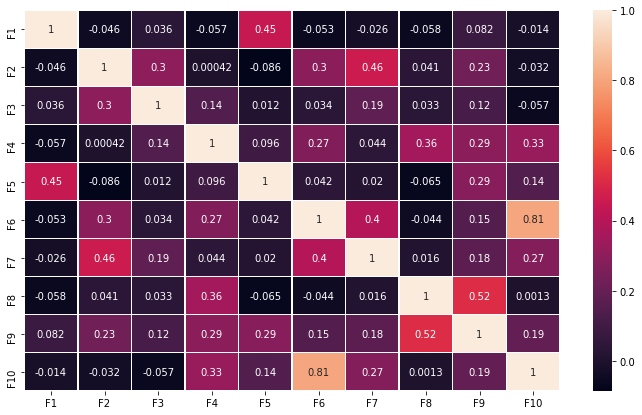

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']].corr(),
            annot=True, linewidths=.5, annot_kws={"size": 10})

In [8]:
data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
C      0
dtype: int64

## Plan para ajustar datos:
1. Eliminar atributo F6 en ambos conjuntos (tiene correlación alta con F10 y otros atributos)
2. Realizar oversampling de las clases minoritarias creando registros sintéticos con las medianas de cada clase, de tal forma que las clases minoritarias tengan por lo menos hasta la mitad de cantidad de elementos de la clase mayoritaria.
3. Convertir el atributo 'C' a escala numérica

El resto de los datos ya se encuentran en escala numérica, no hay atributos nulos y todos los datos se encuentran normalizados. No se realizaran más ajustes sino hasta la segunda iteración.

In [9]:
#1. Eliminar atributo F6
data = data.drop(['F6'], axis=1)

In [10]:
# 2. Se hace el oversampling creando un nuevo conjunto de datos 'data_bal'
major_class = data['C'].value_counts()['A']//2
data_bal = data.copy()
for C in ['F', 'E', 'I', 'X', 'H', 'G', 'D', 'Y', 'C', 'W', 'B']:
    row = data[data['C'] == C].median()
    row['C'] = C
    tmp = pd.DataFrame([row]*(major_class-data['C'].value_counts()[C]))
    data_bal = pd.concat([data_bal, tmp], ignore_index=True)
data_bal['C'].value_counts()

A    8572
X    4286
Y    4286
B    4286
E    4286
W    4286
C    4286
F    4286
I    4286
H    4286
G    4286
D    4286
Name: C, dtype: int64

In [11]:
#3. Convertir el atributo 'C' a escala numérica
u = data_bal.C.unique()
d = dict(zip(u, range(len(u))))
data_bal = data_bal.applymap(lambda s: d.get(s) if s in d else s)

In [12]:
data_bal

,F1,F2,F3,F4,F5,F7,F8,F9,F10,C
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.635431,0.051062,0.032902,-0.086652,1
...,...,...,...,...,...,...,...,...,...,...
55713,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.050300,1.036694,1.233389,0.812733,11
55714,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.050300,1.036694,1.233389,0.812733,11
55715,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.050300,1.036694,1.233389,0.812733,11
55716,-0.128929,12.655362,-0.162690,1.993015,-3.224030,0.050300,1.036694,1.233389,0.812733,11


In [13]:
data_bal['C'].value_counts()

0     8572
11    4286
10    4286
9     4286
8     4286
7     4286
6     4286
5     4286
4     4286
3     4286
2     4286
1     4286
Name: C, dtype: int64

# Entrenamiento y estimación de parámetros
Para los scores de desempeño, se decidió escoger 'micro' en el parametro de average de la función de cada score. Esto con el fin de obtener un único resultado global entre todos los true positives, false negatives y false positives.

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from statistics import mean, stdev

In [15]:
# holdout para MLP
HOLDOUT = 10

h_precision = []
h_recall = []
h_f1score = []

for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(data_bal.drop(['C'],axis=1), data_bal['C'],
                                                        test_size=0.4)
    mlp = MLPClassifier(max_iter=500)
    
    parameter_space = {
        'hidden_layer_sizes': [(50), (100)],
        'activation': ['logistic', 'tanh', 'relu'],
    }

    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)
    
    pred = clf.predict(X_test)
    ps = precision_score(y_test,pred, average='micro')
    rs = recall_score(y_test,pred, average='micro')
    f1s = f1_score(y_test,pred, average='micro')
    
    print("Iteración #{0}:".format(i+1))
    print()
    print(confusion_matrix(y_test, pred))
    print("Precision:",ps)
    print("Recall:",rs)
    print("F1score:",f1s)
    print("Best params", clf.best_params_)
    print()

    h_precision.append(ps)
    h_recall.append(rs)
    h_f1score.append(f1s)

print("Medias de precision, recall y f1score:",mean(h_precision),mean(h_recall),mean(h_f1score))
print("Desviaciones de precision, recall y f1score:",stdev(h_precision),stdev(h_recall),stdev(h_f1score))

/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteración #1:

[[3153  202   53   22    2    0    2    2   42    1    1    0]
 [ 226 1461   17   16    0    2    1    0   20    0    1    0]
 [  42   19 1642   11    0    2    1    0   10    0    1    0]
 [  46   12    6 1606    1    2   14    5    1    1    5    0]
 [   3    1    1    1 1699    0    0    2    0    0    0    0]
 [   1    0    0    4    0 1668    0    8    0    0    0    0]
 [   5    1    0    7    0    0 1692    1    0    0    0    0]
 [   4    0    2   10    1    8    0 1694    0    0    0    0]
 [  29   22    0    3    0    0    0    0 1653    0    0    0]
 [   0    0    0    0    0    0    0    2    0 1695    0    0]
 [   9    0    2    8    0    0    2    0    0    0 1711    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1688]]
Precision: 0.9584529791816224
Recall: 0.9584529791816224
F1score: 0.9584529791816224
Best params {'activation': 'tanh', 'hidden_layer_sizes': 100}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteración #2:

[[3055  218   34   35    2    1    1    4   34    0    2    0]
 [ 189 1466   11   24    0    0    1    1   31    0    0    0]
 [  49   11 1571    3    0    0    3    0   10    0    1    0]
 [  25   12    6 1692    0    1    9    7    3    0    4    0]
 [   4    2    1    0 1731    0    0    0    0    0    0    0]
 [   1    0    1    2    0 1728    0    6    0    0    0    0]
 [   6    5    0   12    0    0 1653    1    0    0    1    0]
 [  11    4    1    8    0    3    0 1760    0    0    0    0]
 [  27   17    1    0    0    0    0    0 1635    0    0    0]
 [   0    0    0    1    0    0    0    0    0 1693    0    0]
 [   2    2    1    0    0    0    2    0    0    0 1707    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1743]]
Precision: 0.9616834170854272
Recall: 0.9616834170854272
F1score: 0.9616834170854272
Best params {'activation': 'tanh', 'hidden_layer_sizes': 100}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteración #3:

[[3130  175   40   34   11    0   12    3   45    0    1    0]
 [ 217 1435   12    9    0    0    2    0   27    0    1    0]
 [  42   12 1644    6    0    0    0    1    1    0    1    0]
 [  23   13    8 1685    0    0   11    9    2    1    4    0]
 [   6    1    0    0 1698    0    0    1    0    0    0    0]
 [   4    1    1    3    0 1760    0   11    0    0    0    0]
 [   5    1    0    7    0    0 1669    0    0    0    1    0]
 [   6    0    1   12    0    9    0 1699    0    0    0    0]
 [  35   18    3    1    0    0    0    0 1620    0    0    0]
 [   0    0    0    0    0    0    0    1    0 1673    0    0]
 [   4    0    0    1    0    0    3    0    0    0 1708    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1708]]
Precision: 0.9614590811198851
Recall: 0.9614590811198851
F1score: 0.9614590811198851
Best params {'activation': 'tanh', 'hidden_layer_sizes': 100}



KeyboardInterrupt: 

In [16]:
# holdout para SVMs
HOLDOUT = 10

h_precision = []
h_recall = []
h_f1score = []

for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(data_bal.drop(['C'],axis=1), data_bal['C'], test_size=0.4)
    svc = SVC(max_iter=500)
    
    parameter_space = {
        'C': [1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }

    clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)
    
    pred = clf.predict(X_test)
    ps = precision_score(y_test,pred, average='micro')
    rs = recall_score(y_test,pred, average='micro')
    f1s = f1_score(y_test,pred, average='micro')
    
    print("Iteración #{0}:".format(i+1))
    print()
    print(confusion_matrix(y_test, pred))
    print("Precision:",ps)
    print("Recall:",rs)
    print("F1score:",f1s)
    print("Best params", clf.best_params_)
    print()

    h_precision.append(ps)
    h_recall.append(rs)
    h_f1score.append(f1s)

print("Medias de precision, recall y f1score:",mean(h_precision),mean(h_recall),mean(h_f1score))
print("Desviaciones de precision, recall y f1score:",stdev(h_precision),stdev(h_recall),stdev(h_f1score))

/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #1:

[[1150 1935   43  117    8    1   38    1   68    0    0    0]
 [ 232 1320   16   67    0    0   34    0   88    0    0    0]
 [  50   56 1562   45    0    0    1    1   13    0    0    0]
 [  64   34   17 1547    1    4   26    4    3    2    5    0]
 [  10    2    0    0 1729    0    0    0    0    0    0    0]
 [   3    4    0   19    0 1668    2   17    2    0    0    0]
 [  34    5    3   75    0    0 1601    1    1    0    1    0]
 [   6    0    2   18    0   27    3 1655    0    0    0    0]
 [  42   41    9   30    0    0    0    3 1576    0    0    0]
 [   4    1    0    5    0    0    0    1    0 1694    0    0]
 [  11    0    7   33    0    0   21    0    0    0 1641    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1728]]
Precision: 0.8466888011486001
Recall: 0.8466888011486001
F1score: 0.8466888011486001
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #2:

[[1113 2090   59  101    1    4   26    3   76    2    0    0]
 [ 192 1317   17   57    0    2   20    0   91    0    0    0]
 [  52   45 1494   30    0    0    0    0   14    0    0    0]
 [  74   51   21 1505    1    5   23    5    1    3   10    0]
 [  12    5    0    0 1710    0    0    0    1    0    0    0]
 [   4    3    1    4    1 1747    0   24    3    0    0    0]
 [  25    7    3   81    0    0 1587    0    2    0    2    0]
 [   5    3    5   21    0   25    0 1731    0    0    0    0]
 [  75   54    5   31    0    0    0    2 1551    0    0    0]
 [   5    0    0    3    0    0    0    0    0 1690    0    0]
 [  16    3    5   21    0    0   14    0    0    0 1615    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1681]]
Precision: 0.8408560660445082
Recall: 0.8408560660445082
F1score: 0.8408560660445082
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #3:

[[1152 1964   51   78    4    0   54    1   73    0    2    0]
 [ 176 1358   11   39    0    1   25    0   75    0    0    0]
 [  42   57 1612   32    0    0    0    0   12    0    0    0]
 [  74   43   10 1542    0    5   33    5    0    0   12    0]
 [   4    2    0    0 1700    0    0    0    0    0    0    0]
 [   4    2    0    2    0 1692    2   14    2    0    0    0]
 [  39    5    3   68    0    1 1646    0    0    0    7    0]
 [  14    2    3   12    1   25    0 1640    0    0    0    0]
 [  46   51    7   19    0    0    0    0 1611    0    0    0]
 [   5    0    0    7    0    0    0    0    0 1678    0    0]
 [   7    5    3   29    0    1    7    0    0    0 1643    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1736]]
Precision: 0.8529253409906676
Recall: 0.8529253409906676
F1score: 0.8529253409906676
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #4:

[[ 907 2285   40   72    3    1   29    4   78    0    0    0]
 [ 107 1466    7   34    0    1   25    0   82    0    0    0]
 [  58   61 1577   31    0    0    0    0   17    0    0    0]
 [  71   51   14 1481    0    6   38    3    5    0   14    0]
 [   8    1    0    1 1682    0    0    0    1    0    0    0]
 [   6    3    0    6    0 1687    4   17    1    0    0    0]
 [  30   14    2   53    0    1 1632    0    0    0    1    0]
 [  10    2    2   11    0   15    0 1661    0    0    0    0]
 [  32   59    8   19    0    1    0    0 1610    0    0    0]
 [  13    0    0    5    0    0    0    0    0 1653    0    0]
 [   9    3    3   25    0    0   14    0    0    0 1667    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1748]]
Precision: 0.8422020818377602
Recall: 0.8422020818377602
F1score: 0.8422020818377602
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #5:

[[ 943 2237   32   68    5    0   32    2   68    0    1    0]
 [ 130 1447   11   31    0    0   23    0   78    0    0    0]
 [  59   60 1597   28    0    0    0    0   15    0    0    0]
 [  83   49   34 1499    0    5   29    8    3    3   13    0]
 [  11    2    0    0 1651    0    0    0    0    0    0    0]
 [   8    1    2    9    1 1695    2   20    0    0    0    0]
 [  25   20    1   72    0    0 1594    0    1    0    1    0]
 [   9    1    4   20    0   18    1 1656    0    0    0    0]
 [  34   58    3   20    0    1    0    7 1569    0    0    0]
 [   8    0    0    5    0    0    0    0    0 1618    0    0]
 [  13    3    5   12    0    0   18    0    0    0 1709    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1787]]
Precision: 0.8419328786791098
Recall: 0.8419328786791098
F1score: 0.8419328786791098
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #6:

[[ 900 2196  129  116    4    4   41    7   89    0    0    0]
 [ 185 1371   20   26    0    0   18    0   70    0    0    0]
 [  19   58 1616   20    0    0    0    1   15    0    0    0]
 [  54   58   19 1472    0    4   48    6    1    0   12    0]
 [   9    0    0    1 1723    0    0    0    1    0    0    0]
 [   1    1    0    8    0 1656    2   18    3    0    0    0]
 [  31   10   12   66    0    1 1598    1    2    0    2    0]
 [   5    4    4   19    0   15    0 1679    1    0    0    0]
 [  28   67   13   28    0    0    0    1 1566    0    0    0]
 [   0    4    0    5    0    0    0    1    0 1719    0    0]
 [  14    4    5    9    0    0   31    0    0    0 1634    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1707]]
Precision: 0.8363693467336684
Recall: 0.8363693467336684
F1score: 0.8363693467336684
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #7:

[[1174 1948   50  121    3    1   39    3   77    5    1    0]
 [ 197 1350   22   57    0    1   28    0   78    0    0    0]
 [  40   40 1575   32    0    1    0    1   14    0    0    0]
 [  55   36   28 1549    1    4   52    6    4    3    8    0]
 [  13    0    0    0 1685    0    0    0    0    0    0    0]
 [   1    4    3    4    1 1673    2   27    2    0    0    0]
 [  39    6    4   49    0    1 1598    1    0    0    0    0]
 [   8    1    2   16    0   20    0 1726    0    0    0    0]
 [  46   55   11   18    0    0    0    0 1586    0    0    0]
 [   3    0    0    3    0    0    0    0    0 1697    0    0]
 [   7    3    5   22    0    0   22    0    0    0 1599    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1721]]
Precision: 0.8494705671213209
Recall: 0.8494705671213209
F1score: 0.8494705671213209
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #8:

[[1199 1930   64   90    0    1   26   10   55    0    0    0]
 [ 190 1403   10   44    0    0   14    0   68    0    0    0]
 [  41   41 1599   27    0    0    0    0    9    0    0    0]
 [  50   53   22 1575    0    3   30    4    1    0   12    0]
 [  17    0    0    0 1710    0    0    0    0    0    0    0]
 [   8    3    1    6    1 1665    2   20    0    0    0    0]
 [  49   19    1   60    0    0 1643    0    0    0    1    0]
 [   4    3    3   14    0   16    0 1642    0    1    0    0]
 [  47   73    9   28    0    0    0    0 1567    0    0    0]
 [   1    0    0    4    0    0    0    2    0 1653    0    0]
 [  11    3    6   28    0    0   12    0    0    0 1653    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1731]]
Precision: 0.8542713567839196
Recall: 0.8542713567839196
F1score: 0.8542713567839196
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #9:

[[ 965 2131   59  142    1    1   34    5   84    2    0    0]
 [ 136 1375   19   66    0    1   30    0   91    0    0    0]
 [  40   63 1613   27    0    0    0    1   13    0    0    0]
 [  47   43   23 1546    0    7   34    4    3    1    7    0]
 [  15    1    0    0 1668    0    0    0    0    0    0    0]
 [   2    2    0    7    0 1672    1   11    0    0    0    0]
 [  20   22   12   58    0    0 1606    0    1    0    0    0]
 [   6    2    3   19    0   24    0 1638    0    0    0    0]
 [  56   46    5   25    0    0    0    0 1566    0    0    0]
 [   8    0    0    5    0    0    0    0    0 1715    0    0]
 [   6    3    7   23    0    0   10    0    0    0 1667    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1742]]
Precision: 0.842291816223977
Recall: 0.842291816223977
F1score: 0.842291816223977
Best params {'C': 10, 'kernel': 'rbf'}



/home/jozdashh/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Iteración #10:

[[1166 1937   33  169    2    1   41   10   81    2    0    0]
 [ 224 1325   14   54    0    0   23    0   90    0    0    0]
 [  54   52 1536   34    0    0    0    0    6    0    0    0]
 [  71   52   25 1495    1    4   44    5    4    2   17    0]
 [  11    0    0    0 1681    0    0    0    0    0    0    0]
 [   7    1    1   14    0 1651    3   16    2    0    0    0]
 [  29   10    1   59    0    1 1592    0    0    0    0    0]
 [   5    1    3   18    0   17    1 1672    0    0    0    0]
 [  56   50    7   35    0    0    0    1 1536    0    0    0]
 [   0    3    0    8    0    0    0    0    0 1738    0    0]
 [  13    2    4   15    0    0   15    0    0    0 1712    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1723]]
Precision: 0.8447146446518305
Recall: 0.8447146446518305
F1score: 0.8447146446518305
Best params {'C': 10, 'kernel': 'rbf'}

Medias de precision, recall y f1score: 0.8451722900215363 0.8451722900215363 0.8451722900215363
Desvia

### Análisis de resultados iteración 1
Segun el resultado de los dos holdout anteriores, se concluye que el modelo que tuvo mejor desempeño fue el de **Multi Layer Perceptron** con un score F1 en promedio del 0.96 (SVMs tuvo en promedio un F1 score del 0.84)

Un aspecto a resaltar es que en las matrices de confusión de cada iteración del holdout en el modelo MLP, la clase por la que se clasificaba más erroneamente era la clase 'A' o '0', la cual es la clase que tiene la mayor cantidad de registros no-sintéticos. Esto quiere decir que el modelo tenía cierta tendencía o bias a la hora identificar registros como pertenecientes a la clase 'A' (overfitting).

# Iteración 2

### Plan de ajustes para mejorar el desempeño
Para el modelo MLP, los parametros con los que se llegó al mejor desempeño fueron la
función de activación "tanh" y una sóla capa oculta de 100 nodos. 


En el espacio de parametros tambien estuvo el parametro de una capa oculta con 50 nodos. Esto quiere sugerir que el número ideal de nodos en una capa oculta se cuentra más cercano a 100 (el número de capas aún está abierto a cambios). Las acciones a realizar para mejorar el modelo seran:

- Aproximar de forma más precisa el parametro de 'hidden_layers' con la siguiente lista de entrada: [(80), (150), (100, 100)]. Decidí escoger estos nuevos valores para verificar si aumentar o disminuir el tamaño de la cantidad de nodos en la capa oculta (100 en la primera iteración) produciría mejor desempeño. También tomé en cuenta el caso de que 100 nodos fuera la cantidad que lograra mejor desempeño, y aumenté el número de capas en uno para ver si habría mejoría y valdría la pena explorar aún más cantidad de capas ocultas.


- Aproximar el parametro para optimización de pesos 'solver' del modelo, el cual no habia tenido en cuenta en la iteración anterior. Se exploraran sólo los solvers 'sgd' y 'adam', ya que según la documentación de sklearn, el solver 'lbfgs' funciona mejor con datasets pequeños.

In [17]:
# Cubrimiento más fino con respecto al parametro de hidden_layer_sizes y exploración de parametro 'solver'

# Clasificador base
mlp = MLPClassifier(activation='tanh', max_iter=500, random_state=42)

parameter_space = {
        'hidden_layer_sizes': [(100, 100), (80), (150)],
        'solver': ['sgd', 'adam'],
    }

X_train, X_test, y_train, y_test = train_test_split(data_bal.drop(['C'],axis=1), data_bal['C'], test_size=0.4)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print(confusion_matrix(y_test, pred))
print("precision", precision_score(y_test,pred,average='micro'))
print("recall:", recall_score(y_test,pred,average='micro'))
print("f1-score:", f1_score(y_test,pred,average='micro'))
print("best params:", clf.best_params_)

[[3457   28    4    6    1    0    2    1    1    0    1    0]
 [  39 1674    7    8    0    0    0    1    5    0    1    0]
 [  11    3 1628    1    0    1    0    0    1    0    0    0]
 [   4    6    1 1680    0    0    2    8    0    0    0    0]
 [   5    0    0    0 1704    0    0    0    0    0    0    0]
 [   0    0    0    1    0 1650    0    2    0    0    0    0]
 [  10    0    0    4    0    0 1692    2    0    0    1    0]
 [   3    0    0    4    0    7    0 1753    0    0    0    0]
 [   6    1    5    0    0    0    0    0 1680    0    0    0]
 [   1    0    0    0    0    0    0    0    0 1738    0    0]
 [   2    1   10    2    0    0    0    0    0    0 1734    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1688]]
precision 0.9905778894472361
recall: 0.9905778894472361
f1-score: 0.9905778894472361
best params: {'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


### Análisis de resultados iteración 2
Se logró una mejoría con respecto a la iteración anterior de ~0.96 a ~0.99. Comparando las matrices de confusión de la iteración anterior y ésta, el modelo ahora realiza menos clasificaciones erroneas de otras clases como pertenecientes a las clase 'A' o '0'. Como se puede ver en la primer columna, los números debajo de la posición (0,0) son bastante más pequeños que en las matrices de la iteración 1 (también las clasificaciones erroneas de otras clases disminuyeron en el resto de la matriz). Esto quiere decir que el overfitting mencionado en el análisis de la iteración 1 ha disminuido.

- El parametro 'solver' no presentó cambios en cuanto a la primera iteración (ya que 'adam' es el default).
- El número de nodos por capa que presentó mejor desempeño fue 100, y la adición de una capa extra con la misma cantidad de nodos fue el cambio que causó la mejoría en esta iteración.

# Iteración 3

### Plan de ajustes para mejorar el desempeño

Para esta tercera iteración, se probará realizar los siguientes ajustes:
- Aproximar el parametro de penalización 'alpha' con los valores 0.00001, 0.0001 y 0.05.
- Cambiar la proporción de la cantidad de datos de entrenamiento por 0.75 en lugar de 0.60


Me pareció adecuado aumentar el tamaño del conjunto de entrenamiento porque en la primera iteración se realizó oversampling, lo cual aumentó el tamaño de todo el conjunto de datos de 20867 a 55718 registros (más del doble).

In [19]:
# Clasificador base
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='adam',
                    max_iter=500, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data_bal.drop(['C'],axis=1), data_bal['C'], test_size=0.25)

parameter_space = {
    'alpha': [0.00001, 0.0001, 0.05],
    }

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print(confusion_matrix(y_test, pred))
print("precision", precision_score(y_test,pred,average='micro'))
print("recall:", recall_score(y_test,pred,average='micro'))
print("f1-score:", f1_score(y_test,pred,average='micro'))
print("best params:", clf.best_params_)

[[2140    7    3    3    0    0    1    1    2    0    0    0]
 [   9 1041    1    5    0    0    0    1    0    0    1    0]
 [   3    1 1096    1    0    0    0    0    0    0    2    0]
 [   2    2    0 1050    0    0    0    1    0    0    0    0]
 [   1    0    0    0 1039    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1040    0    0    0    0    0    0]
 [   1    0    0    1    0    0 1091    1    0    0    0    0]
 [   0    0    0    1    0    1    0 1109    0    0    0    0]
 [   4    1    0    0    0    0    0    0 1014    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1063    0    0]
 [   0    0    0    0    0    0    0    0    1    0 1103    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1086]]
precision 0.9958363244795405
recall: 0.9958363244795405
f1-score: 0.9958363244795405
best params: {'alpha': 0.0001}


### Análisis de resultados iteración 3
El parametro de 'alpha' no presentó cambios (el default asignado es 0.0001). Sin embargo, el aumento de tamaño del conjunto de datos logró una mejora de un F1-score de ~0.990 a ~0.995. Es decir, se obtuvo una mejora bastante mínima. Hay que resaltar que desde la iteración 2 el modelo ya presenta un nivel de precisión y recall muy elevados (de ~0.99 ambos), por lo cual poder mejorarlo más allá de unas cuantas pequeñas fracciones es una tarea compleja, sin mencionar un poco redundante, ya que el modelo mostraba un nivel de desempeño casi que perfecto.

Con respecto a la matriz de confusión, se resalta el hecho de que si bien la clase 'A' es la más erroneamente asignada, estas clasificaciones erroneas asociadas a esta clase se redujeron un poco con respecto a la iteración anterior, posiblemente por la re-partición del conjunto de datos de entrenamiento, lo cual permitió reducir el overfitting con respecto a esta clase por lo menos un poco.

# Análisis y conclusiones generales
Como se mencionó anteriormente, en la segunda iteración ya se demostraba un desempeño casi que perfecto en el modelo MLP. Inicialmente se había planeado realizar el balanceo de clases no en la primera iteración sino en la segunda. Sin embargo, tenía era más justo comparar ambos modelos con unos datos base que estuvieran en su mejor estado posible, ya que en el resto de iteraciones, no se modificó directamente el conjunto de datos de ninguna forma.


Existen varios métodos para realizar balanceo de multi clases. Durante el proceso, se intentó usar la técnica de Synthetic Minority Over-sampling Technique for Nominal and Continuous Data (SMOTE-NC) con la libreria imblearn, pero desafortunadamente la documentación de tal librería no contenía la suficiente información detallada para usar las funciones que implementan la técnica efectivamente.


Algo aprendido de este parcial es la necesidad emergente de tener un buen manejo del tiempo cuando se tienen conjuntos de datos con muchos registros, como en este caso. Solo para poder procesar ambas 10 iteraciones de ambos modelos en la primera iteración tomaba alrededor de 6 horas, y cada re-entrenamiento en las iteraciones siguientes unos 50 minutos cáda una. Esto obliga al programador a realizar pruebas y verificaciones de forma más metódica.